## Observations and Insights 

In [86]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID",how="left")
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [93]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the 
#tumor volume for each regimen
SSGroup = merged_df.groupby('Drug Regimen')
regimen = SSGroup.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
regimen

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [96]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

means = merged_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
medians = merged_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variances = merged_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
standards = merged_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sems = merged_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

MeanCalculation = pd.DataFrame(means)
MeanCalculation2 = MeanCalculation.rename(columns={"Tumor Volume (mm3)": "Mean"})

MeanCalculation2["Median"] = medians
MeanCalculation2["Variance"] = variances
MeanCalculation2["std"] = standards
MeanCalculation2["sem"] = sems

MeanCalculation2

,Mean,Median,Variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


Text(0.5, 1.0, 'Data Points for Each Treatment Regimen')

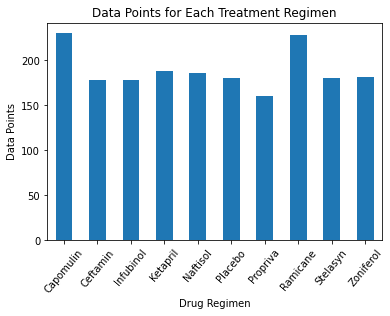

In [47]:
# Generate a bar plot showing number of data points for each 
#treatment regimen using pandas

Bar_Plot = merged_df.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
Pandas_Bar_Plot = pd.DataFrame(Bar_Plot)


also = Pandas_Bar_Plot.plot.bar(legend=False,rot=50)
also


plt.ylabel("Data Points")
plt.title("Data Points for Each Treatment Regimen")


ValueError: shape mismatch: objects cannot be broadcast to a single shape

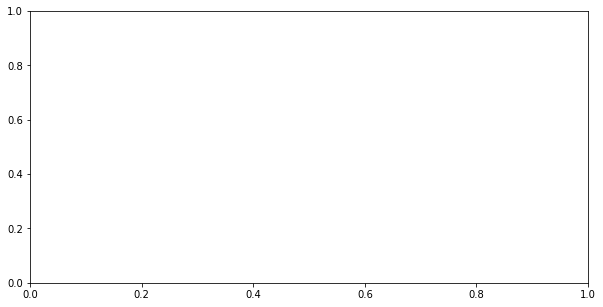

In [48]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x_axis = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y_axis = list()

plt.figure(figsize=(10,5))
plt.bar(x_axis, y_axis)
x_ticklabels= [""]
tick_locations=[balue for value in x_axis]
plt.xticks(tick_locations, x_ticklabels, roation="")

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+20)

plt.title()
plt.xlabel()
plt.ylabel()


In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
.groupby("Sex")

.count()

labels= ["Female", "Male"]

colors = ["red", "green"]

plt.pie(#.count()#, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')

plt.savefig('piechart1')
plt.show()


NameError: name 'sizes' is not defined

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
.plot.pie



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#groupy(["Mouse ID"])["Timepoint"].max()
# Start by getting the last (greatest) timepoint for each mouse
#.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#.merge(, , on=["Mouse ID", "Timepoint"], how="left")

In [69]:
Final_Capomulin = cap_df.groupby('Mouse ID').max()['Timepoint']
Final_Capomulinvol = pd.DataFrame(Final_Capomulin)
Final_Capomulinmerge = pd.merge(Final_Capomulinvol, merged_df, 
                                on=("Mouse ID","Timepoint"),how="left")
Final_Capomulinmerge.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
tumors = caplastmerge["Tumor Volume (mm3)"]

quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")


Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.


In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [140]:
Line_Plot_DF = cap_df.loc[cap_df["Mouse ID"] == "l509",:]
Line_Plot_DF.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2


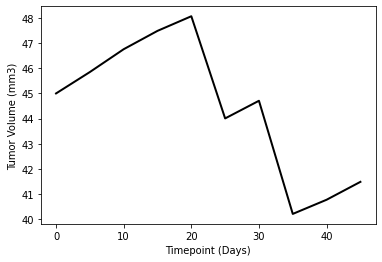

In [146]:
TP = Line_Plot_DF["Timepoint"]
TV = Line_Plot_DF["Tumor Volume (mm3)"]

plt.plot(TP, TV,linewidth=2, color ='black')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

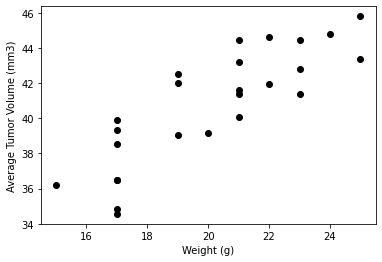

In [147]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capavg = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'], color='black')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

In [126]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [131]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])[0],2)
print()

In [132]:
Linear_Regr_Model = st.linregress(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
Linear_Regr_Model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

In [133]:
slope = 0.9544396890241045
intercept = 21.552160532685015

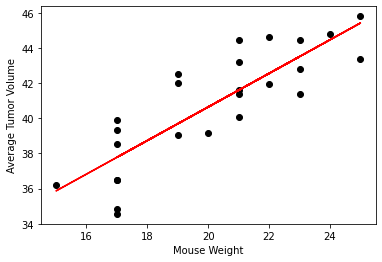

In [150]:

y_values = capavg['Weight (g)']* slope + intercept
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'], color = 'black')
plt.plot(capavg['Weight (g)'],y_values, 'red')
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')

plt.show()